In [1]:
# Colab Setup
# If running in Google Colab, install the required libraries.
!pip install -q -Uqq nixtla cryptocmd
!pip install -q dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 2.6 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
from nixtla import NixtlaClient

In [3]:
# Initialize the NixtlaClient with your API key
# Replace 'your_api_key' with your actual Nixtla API key.
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')
nixtla_client = NixtlaClient(api_key=NIXTLA_API_KEY)

In [8]:
# Load Bitcoin price dataset
# This dataset contains the closing price of Bitcoin in USD.
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')

In [9]:
# Rename columns for compatibility
# Rename 'Date' to 'ds' and 'Close' to 'y'.
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [10]:
# Display the first few rows of the dataset
df.head()

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


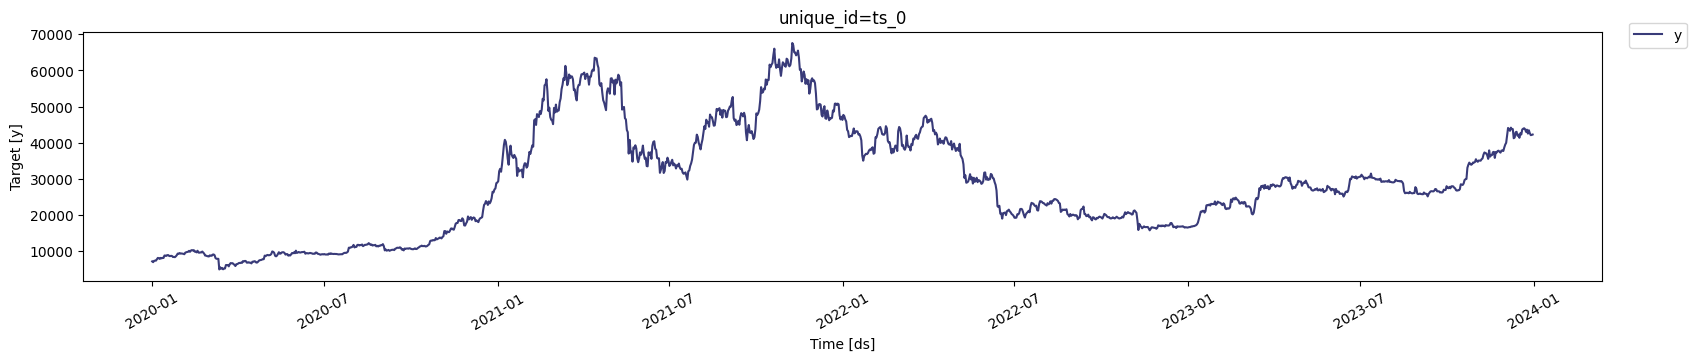

In [11]:
# Plot the Bitcoin price time series
nixtla_client.plot(df)

In [12]:
# Forecast Bitcoin prices using TimeGPT
# Specify forecast horizon (7 days) and confidence levels.
forecast_horizon = 7
confidence_levels = [50, 80, 90]

forecast = nixtla_client.forecast(
    df=df,
    h=forecast_horizon,
    level=confidence_levels
)

In [13]:
# Display the forecast results
forecast.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2024-01-01,42269.460,43158.164,44109.050,44971.670,41380.758,40429.870,39567.250
1,2024-01-02,42469.918,43473.414,44361.574,45241.890,41466.420,40578.260,39697.945
2,2024-01-03,42864.080,43443.895,44141.930,45189.332,42284.260,41586.227,40538.824
3,2024-01-04,42881.620,43704.770,44547.130,45160.117,42058.473,41216.113,40603.125
4,2024-01-05,42773.457,44057.152,44881.527,45333.210,41489.760,40665.387,40213.703


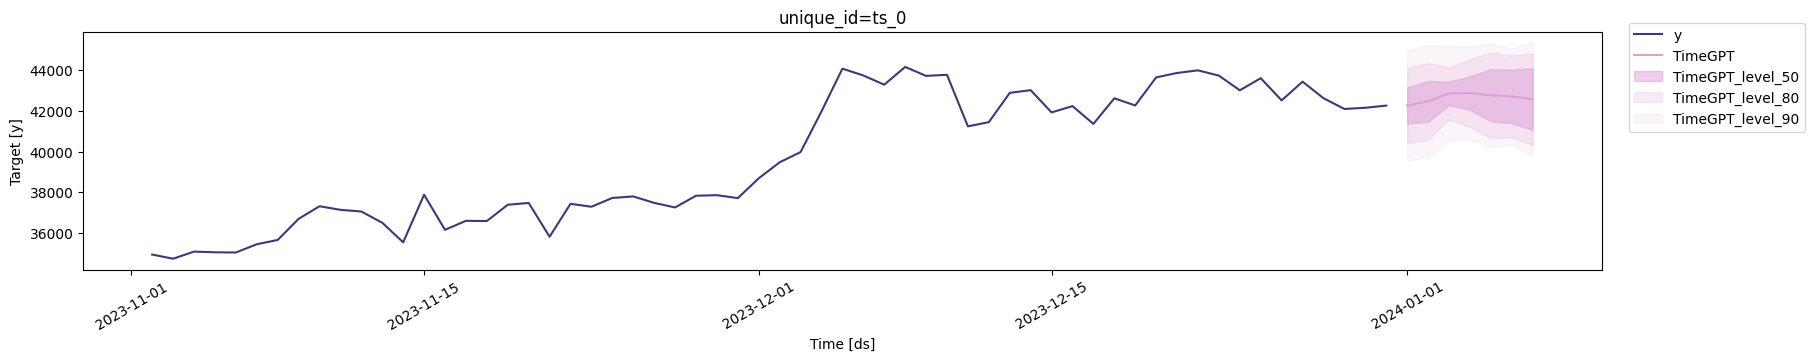

In [14]:
# Plot the forecast along with historical data
nixtla_client.plot(df, forecast, level=confidence_levels, max_insample_length=60)

In [15]:
# Historical forecast for comparison
historical_forecast = nixtla_client.forecast(
    df=df,
    h=forecast_horizon,
    level=confidence_levels,
    add_history=True
)

In [16]:
# Display historical forecast results
historical_forecast.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2020-02-03,9425.740,11229.343,12852.642,13824.121,7622.1370,5998.8384,5027.3594
1,2020-02-04,9568.520,11372.122,12995.421,13966.900,7764.9165,6141.6177,5170.1387
2,2020-02-05,9557.102,11360.704,12984.003,13955.482,7753.4985,6130.1997,5158.7207
3,2020-02-06,9486.128,11289.730,12913.029,13884.509,7682.5250,6059.2260,5087.7470
4,2020-02-07,9475.263,11278.865,12902.164,13873.644,7671.6597,6048.3610,5076.8820


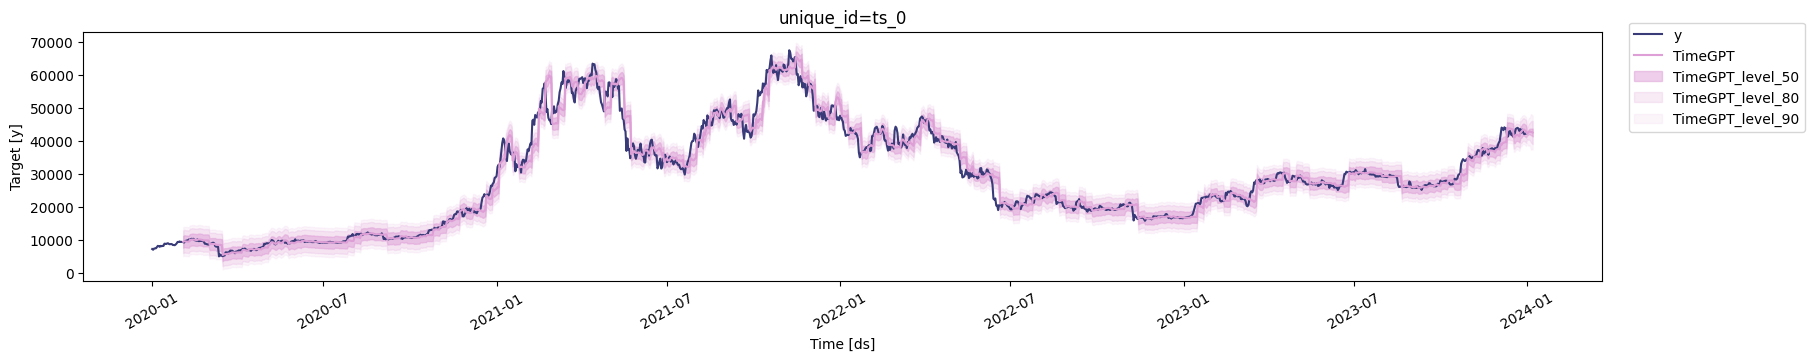

In [17]:
# Plot historical forecast
nixtla_client.plot(df, historical_forecast, level=confidence_levels)